In [1]:
import pandas as pd
answers = pd.read_csv("./output/answers.csv")
specs = pd.read_csv("./output/model_specs.csv")
answers.head()
answers.loc[2].answer, answers.loc[2].model_name, 

("**Washington Spirit – 2024\u202fSeason Roster (as of the end of the 2024 NWSL season)**  \n\nBelow is the most recent, fully‑verified roster for the Washington\u202fSpirit that was publicly available through the club’s official website, press releases, and NWSL transaction logs up to the close of the 2024 season (November\u202f2024).  This list reflects the players who were under contract and part of the first‑team squad when the 2024 season concluded.  \n\n> **Important note:**\u202fThe NWSL offseason is now underway (2025\u202fpre‑season begins in March).  The Spirit have already made a few moves for the 2025 campaign (e.g., a new international signing and a couple of contract extensions) that have not been formally announced or reflected in the league’s public roster database as of this writing (September\u202f2025).  For the absolutely latest roster—including any mid‑season additions, loan returns, or preseason trialists—please consult:\n> - The official Washington **Spirit** web

In [2]:
answers.groupby('model_name')['time'].mean()

model_name
Qwen/Qwen2.5-0.5B-Instruct            2.169136
google/gemma-3-270m-it                2.622631
gpt-oss-120b                          0.975123
llama-4-maverick-17b-128e-instruct    0.369016
meta-llama/Llama-3.2-1B-Instruct      1.361552
qwen-3-235b-a22b-instruct-2507        0.610039
Name: time, dtype: float64

,model,model_load_time,mean_answer_time,source,name
0,gpt-oss-120b,NaN,0.975123,api,gpt-oss
1,llama-4-maverick-17b-128e-instruct,NaN,0.369016,api,llama-4
2,qwen-3-235b-a22b-instruct-2507,NaN,0.610039,api,qwen-3
3,google/gemma-3-270m-it,6.351986,2.622631,local,gemma-3
4,Qwen/Qwen2.5-0.5B-Instruct,3.671900,2.169136,local,qwen-2.5
5,meta-llama/Llama-3.2-1B-Instruct,5.605950,1.361552,local,llama-3.2


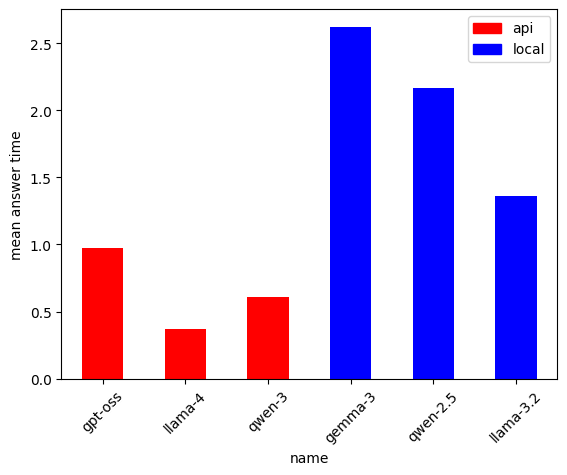

In [3]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import pandas as pd
colors = {"api": 'r', "local": 'b'}
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = [i for i in colors]
specs.plot.bar(x="name", y="mean_answer_time", rot=45,ylabel="mean answer time", 
               color=[colors[i] for i in specs['source']])
plt.legend(handles, labels)

specs


In [6]:
answers['answer_len'] = answers['answer'].apply(len)

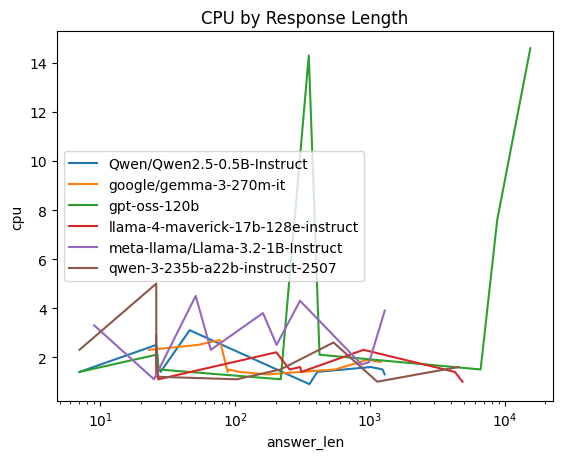

In [36]:
import matplotlib.pyplot as plt
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
cpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['cpu'].apply(list)
for idx, val in enumerate(cpu_by_model.values):
    x1 = lens_by_model.values[idx]
    y1 = val
    plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("answer_len")
plt.ylabel("cpu")
plt.title("CPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()